# Importing the data

In [94]:
import pandas as pd
import numpy as np
import sys
sys.path.append("/home/me/mypy")
red = 'datasets/winequality-red.csv'
white = 'datasets/winequality-white.csv'

In [95]:
df_red = pd.read_csv(red,delimiter=';')
df_white = pd.read_csv(white,delimiter=';')

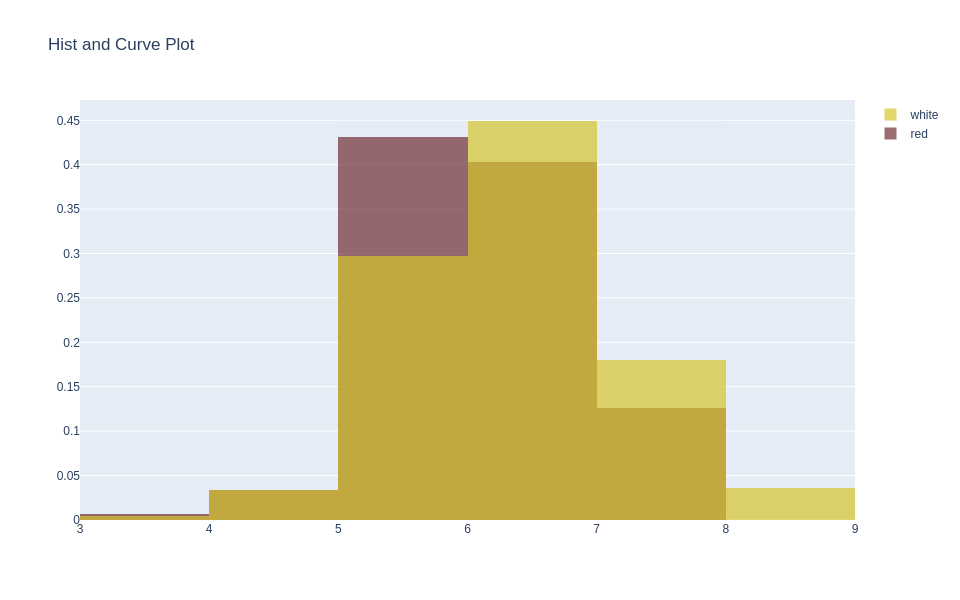

In [127]:
import plotly.figure_factory as ff

colors = ['#722f37','#d4c52d']
hist_data = [df_red['quality'].to_numpy(),df_white['quality'].to_numpy()]
group_labels = ['red','white'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels,colors = colors, show_rug=False,show_curve=False)
fig.update_layout(title_text='Hist and Curve Plot',height=600,width=800)
fig.show()

## Merging white and red dfs

In [119]:
df_red['type'] =  np.full(df_red.shape[0],"red") 
df_white['white'] = np.full(df_white.shape[0],"white")

In [122]:
df_all = pd.concat([df_red,df_white])

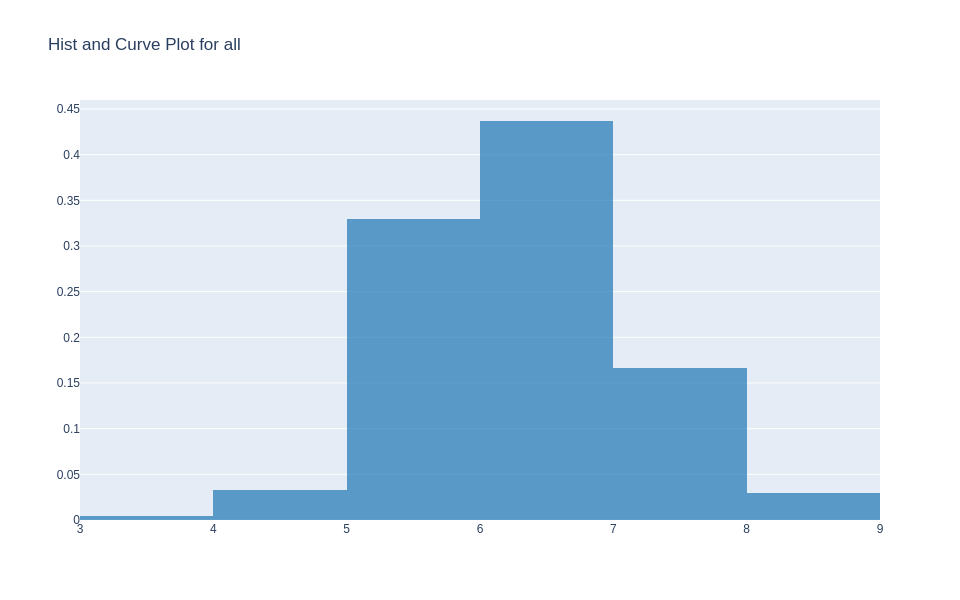

In [126]:
hist_data = [df_all['quality'].to_numpy()]
group_labels = ['wines'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels, show_rug=False,show_curve=False)
fig.update_layout(title_text='Hist and Curve Plot for all',height=600,width=800)
fig.show()

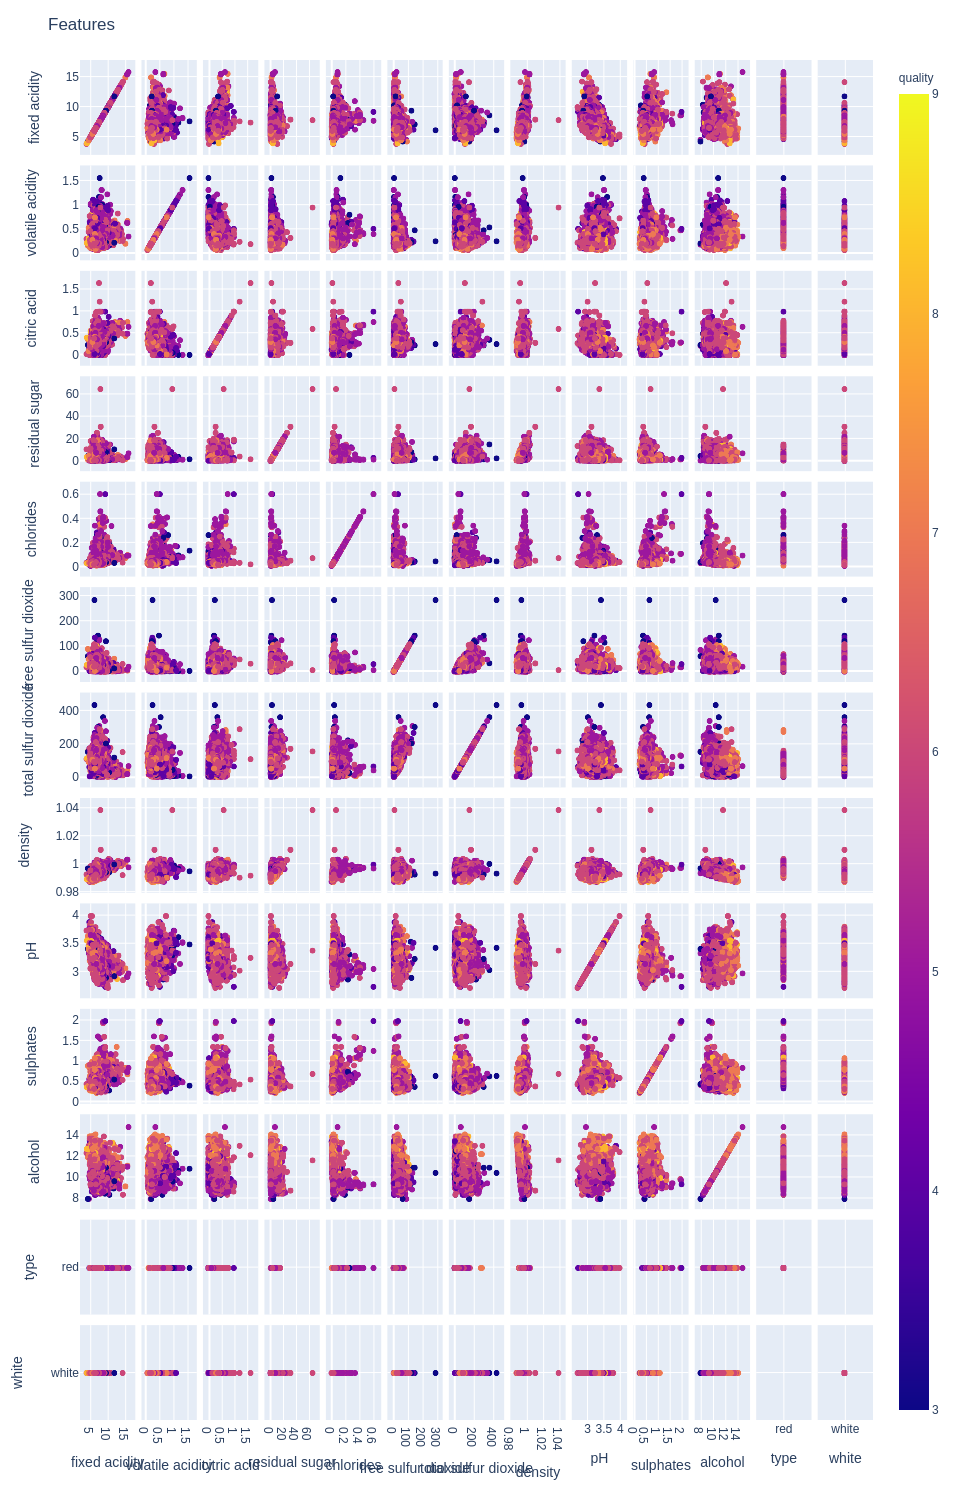

In [142]:
import plotly.express as px
dims=list(df_all.drop(columns="quality").columns)
fig = px.scatter_matrix(df_all, dimensions=dims, color="quality")
fig.update_layout(title_text='Features',height=1500,width=1500)
fig.show()

# Dividing into test and training sets

In [129]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["quality"])
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


# SVM

In [133]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X, y)

SVC()